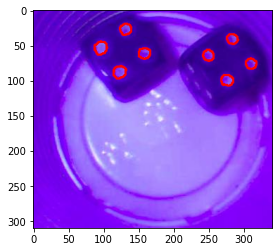

In [34]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from glob import glob
%matplotlib inline 


# camera = cv2.VideoCapture(0)
# _, _ = camera.read()


##TU JEST KOD, KTÓRY W ZAŁOŻENIU MA DZIAŁAĆ 
##Następne komórki to raczej playground

img = cv2.imread('test2.jpg')
img = img[170:-50,250:-100]
imgraw = img[:]

_,_,blue = cv2.split(img)

ret, threshh = cv2.threshold(blue, 100, 255, cv2.THRESH_BINARY)
contours,_ = cv2.findContours(threshh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    (_,_,w,h) = cv2.boundingRect(c)
    if 100<cv2.contourArea(c)<=400  and 0.8<w/h<1.2:  
        cv2.drawContours(imgraw, [c], -1, (0, 0, 255), 2)
    plt.imshow(cv2.cvtColor(imgraw,cv2.COLOR_BGR2RGB))


In [25]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

def getThresh(img,lower=100,upper=255,brightness=75,contrast=128):
    
    img = cv2.imread(img)
    img = img[170:-50,250:-100]
    #img = apply_brightness_contrast(img,brightness,contrast)
    _,_,blue = cv2.split(img)
    
    ret, threshh = cv2.threshold(blue, lower, upper, cv2.THRESH_BINARY)
    #thresh = cv2.adaptiveThreshold(blue,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
    plt.imshow(threshh)
    
interactive(getThresh,img=glob("*.jpg"),lower=(0,255,1),upper=(0,255,1),brightness = (-128,128,1),contrast = (-128,128,1))


interactive(children=(Dropdown(description='img', options=('test2.jpg', 'test.jpg'), value='test2.jpg'), IntSl…

In [32]:
def getAllParams(img,lowerTh=90,upperTh=255,lowerSize=300,upperSize=1500):
    img = cv2.imread(img)
    imgraw = img[:]
    img = img[170:-50,250:-100]
    _,_,blue = cv2.split(img)
    
    ret, threshh = cv2.threshold(blue, 100, 255, cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(threshh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
    for c in contours:
        (_,_,w,h) = cv2.boundingRect(c)
        if lowerSize<cv2.contourArea(c)<=upperSize  and 0.8<w/h<1.2:  
            cv2.drawContours(imgraw, [c], -1, (0, 0, 255), 2)
    plt.imshow(cv2.cvtColor(imgraw,cv2.COLOR_BGR2RGB))
    
interactive(getAllParams,img=glob("*.jpg"),lowerTh=(0,255,1),
            upperTh=(0,255,1),lowerSize=(0,100,1),upperSize=(0,2000,10))


interactive(children=(Dropdown(description='img', options=('test2.jpg', 'test.jpg'), value='test2.jpg'), IntSl…